# Graph

A graph data strucutre is a collection of nodes that have data and are connected to other nodes.

A Graph is a non-linear data structure consisting of nodes and edges. The nodes are sometimes also referred to as vertices and the edges are lines or arcs that connect any two nodes in the graph. More formally a Graph can be defined as,

` A graph consists of a finite set of vertices (or nodes) and set of Edges which connect a pair of nodes`

Formally, a graph is a pair of sets (V,E) where V is the set of vertices and E is the set of edges, connecting the pairs of vertices. Take a look at the following graph:

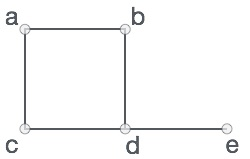

In the above graph,

- V = {a,b,c,d,e}
- E = {ab, ac, bd, cd, de}

### Graph Data Structure

Mathematical graphs can be represented in data structure. We can represent a graph using an array of vertices and a two dimensional array of edges. Before we proceed further, let's familiarize ourselves with some important terms - 

- **Vertex** - Each node of the graph is represented as a vertex. In the following example, the labeled circle represents vertices. Thus A to G are vertices. We can represent them using an array as shown in the following image. Here A can be identified by index 0. B can be identified using index 1 and so on.


- **Edge** - Edge represents a path between two vertices or a line between two vertices. In the follwoing example, the lines from A to B, B to C, and so on represents edges. We can use a two-dimensional array to represent an array as shown in the following image. Here AB can be represented as 1 at row 0, column 1, BC as 1 at row 1, column 2 and so on, keeping other combinations as 0.

- **Adjacency**- Two node or vertices are adjacent if they are connected to each other through an edge. In the following example, B is adjacent to A, C is adjacent to B, and so on.

- **Path** - Path represents a sequence of edges between the two vertices. In the following example, ABCD represents a path from A to D.

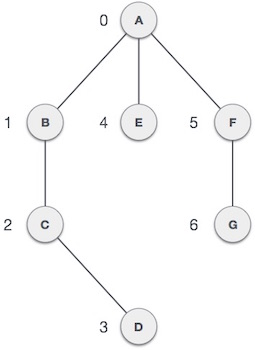

### Basic Operations

Following are basic primary operations of a Graph -

- **Add Vertex** - Adds a vertex to the graph.
- **Add Edge** - Adds an edge between the two vertices of the graph
- **Display Vertex** - Displays a vertex of the graph

A graph data structure is a collection of nodes that have data and are connected to other nodes.

Let's try to understand this through an example. On facebook, everything is a node. That includes User, Photo, Album, Event, Group, Page, Comment, Story, Video, Link, Note... anything that has data is a node.

Every relationship is an edge from one node to another. Whether you post a photo, join a group, like a page, etc a new edge is created for that relationship.

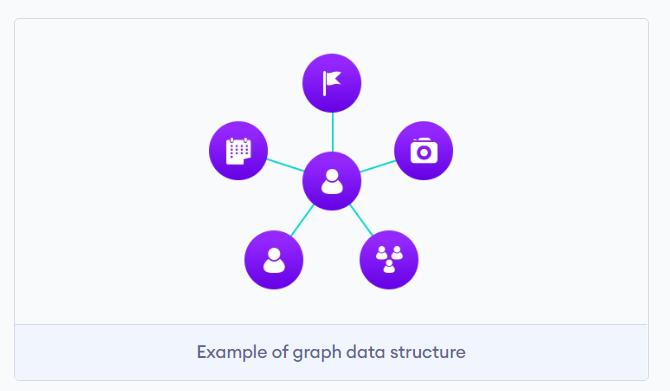

All of facebook is then a collection of these nodes and edges. This is because facebook uses a graph data structure to store its data.

More precisely, a graph is a data strucutre (V,E) that consists of:

- A collection of vertices V
- A collection of edges E, represented as ordered pairs of vertices (u,v).

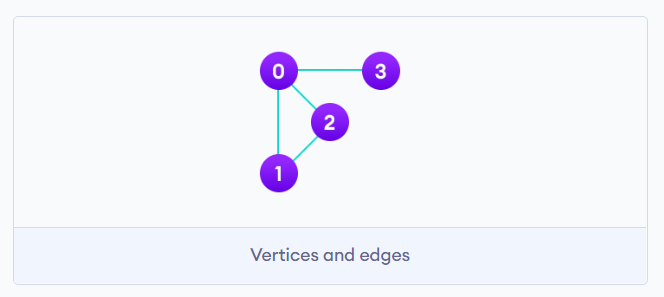

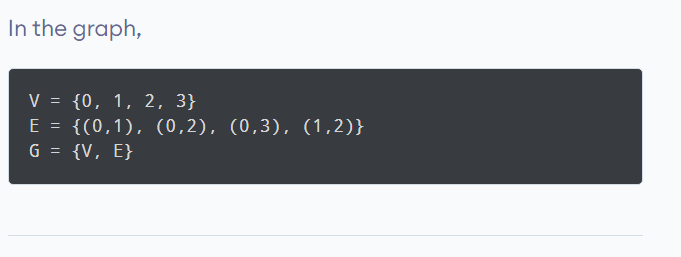


### Graph Terminology


- **Adjacency**: A vertex is said to be adjacent to another vertex if there is an edge connecting them. Vertices 2 and 3 are not adjacent because there is no edge between them.

- **Path**: A sequence of edges that allows you to go from vertex A to vertex B is called a path. 0-1, 1-2, and 0-2 are paths from vertex 0 to vertex 2.

- **Directed Graph**: A graph in which an edge (u,v) doesn't necessarily mean that there is an edge (v, u) as well. The edge is such a graph are represented by arrows to show the direction of the edge.


### Graph Representation

Graphs are commonly represented in two ways:

**1. Adjacency Matrix**

An adjacency matrix is a 2D array of V * V vertices. Each row and column represent a vertex.

If the value of any element `a[i][j]` is 1, it represents that there is an edge connecting vertex i and vertex j.

The adjacency matrix for the graph we created above is

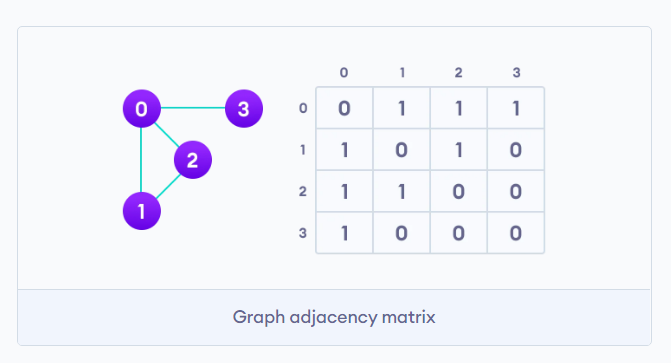

Since it is an undirected graph, for edge (0,2) we also need to mark edge (2,0); making the adjacency matrix symmetric about the diagonal.

Edge lookup (checking if an edge exists between vertex A and vertex B) is extremely fast in adjacency matrix representation but we have to reserve space for every possible link between all vertices (V * V), so it require more space.


**2. Adjacency List**

An adjacency list represents a graph as an array of linked lists.

The index of the array represents a vertex and each element in its llinked represents the other vertices that form an edge with the vertex.

The adjacency list for the graph we made in the first example is as follows:

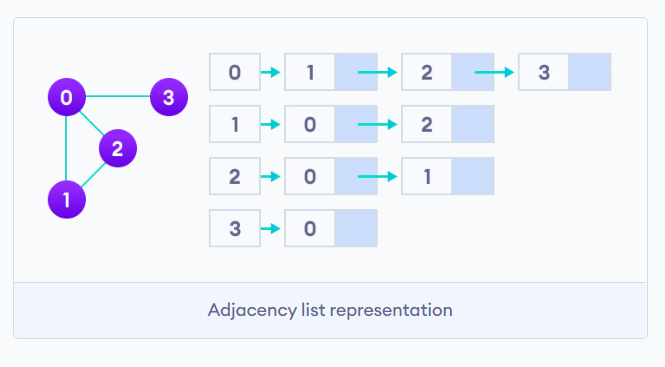

An adjacency list is efficient in terms of storage because we only need to store the values for the edges. For a graph with million of vertices, this can mean a lot of saved space.

## Codes

In [3]:
class Graph:
    def __init__(self, edges):
        self.edges = edges
        self.graph_dict = {}
        for start, end in edges:
            if start in self.graph_dict:
                self.graph_dict[start].append(end)
            else:
                self.graph_dict[start] = [end]
        print("Graph Dict:", self.graph_dict)

    def get_paths(self, start, end, path=[]):
        path = path + [start]

        if start == end:
            return [path]

        if start not in self.graph_dict:
            return []

        paths = []
        for node in self.graph_dict[start]:
            if node not in path:
                new_paths = self.get_paths(node, end, path)
                for p in new_paths:
                    paths.append(p)

        return paths

    def get_shortest_path(self, start, end, path=[]):
        path = path + [start]

        if start == end:
            return path

        if start not in self.graph_dict:
            return None

        shortest_path = None
        for node in self.graph_dict[start]:
            if node not in path:
                sp = self.get_shortest_path(node, end, path)
                if sp:
                    if shortest_path is None or len(sp) < len(shortest_path):
                        shortest_path = sp

        return shortest_path

if __name__ == '__main__':

    routes = [
        ("Mumbai","Pune"),
        ("Mumbai", "Surat"),
        ("Surat", "Bangaluru"),
        ("Pune","Hyderabad"),
        ("Pune","Mysuru"),
        ("Hyderabad","Bangaluru"),
        ("Hyderabad", "Chennai"),
        ("Mysuru", "Bangaluru"),
        ("Chennai", "Bangaluru")
    ]

    routes = [
        ("Mumbai", "Paris"),
        ("Mumbai", "Dubai"),
        ("Paris", "Dubai"),
        ("Paris", "New York"),
        ("Dubai", "New York"),
        ("New York", "Toronto"),
    ]

    route_graph = Graph(routes)

    start = "Mumbai"
    end = "New York"

    print(f"\n All paths between: {start} and {end} : \n ",route_graph.get_paths(start,end))
    print(f"\n Shortest path between {start} and {end}: \n", route_graph.get_shortest_path(start,end))

    start = "Dubai"
    end = "New York"

    print(f"\n All paths between: {start} and {end}: \n ",route_graph.get_paths(start,end))
    print(f"\n Shortest path between {start} and {end}: \n", route_graph.get_shortest_path(start,end))


Graph Dict: {'Mumbai': ['Paris', 'Dubai'], 'Paris': ['Dubai', 'New York'], 'Dubai': ['New York'], 'New York': ['Toronto']}

 All paths between: Mumbai and New York : 
  [['Mumbai', 'Paris', 'Dubai', 'New York'], ['Mumbai', 'Paris', 'New York'], ['Mumbai', 'Dubai', 'New York']]

 Shortest path between Mumbai and New York: 
 ['Mumbai', 'Paris', 'New York']

 All paths between: Dubai and New York: 
  [['Dubai', 'New York']]

 Shortest path between Dubai and New York: 
 ['Dubai', 'New York']
